In [28]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.dates as mdates 
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']


## 台灣COVID-19冠狀病毒檢測每日送驗數
#### 通報日：通報衛生單位日期。
#### 法定傳染病通報：符合第五類法定傳染病「嚴重特殊傳染性肺炎」(COVID-19)通報定義而進行通報送驗者。
#### 居家檢疫送驗：疫情初期，於居家檢疫期間出現相關症狀而通報送驗者，後隨疫情發展擴大社區監測對象，此部份送驗合併入「擴大監測送驗」。<font color=red>進資料分析階段drop掉</font>
#### 擴大監測送驗：未符合「嚴重特殊傳染性肺炎」通報定義，但臨床醫師懷疑，經評估認為有必要通報送驗者。
#### TOTAL：前述三類通報送驗數加總。

In [29]:
data=pd.read_excel('train_data.xlsx')
data.head()

,通報日,法定傳染病通報,居家檢疫送驗,擴大監測送驗,Total
0,2020-01-15,0,0,0,0
1,2020-01-16,4,0,0,4
2,2020-01-17,0,0,0,0
3,2020-01-18,1,0,0,1
4,2020-01-19,1,0,0,1


In [30]:
data.tail()

,通報日,法定傳染病通報,居家檢疫送驗,擴大監測送驗,Total
1077,2022-12-27,0,0,0,0
1078,2022-12-28,0,0,0,0
1079,2022-12-29,0,0,0,0
1080,2022-12-30,0,0,0,0
1081,2022-12-31,0,0,0,0


In [31]:
data.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   通報日      1082 non-null   datetime64[ns]
 1   法定傳染病通報  1082 non-null   int64         
 2   居家檢疫送驗   1082 non-null   int64         
 3   擴大監測送驗   1082 non-null   int64         
 4   Total    1082 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 42.4 KB
________________________________________


In [32]:
data.describe()

,法定傳染病通報,居家檢疫送驗,擴大監測送驗,Total
count,1082.000000,1082.000000,1082.000000,1082.000000
mean,7962.821627,1.577634,10898.508318,18862.907579
std,17466.485308,11.876328,12145.847938,23476.434066
min,0.000000,0.000000,0.000000,0.000000
25%,27.250000,0.000000,291.250000,325.000000
50%,84.000000,0.000000,5339.000000,13050.000000
75%,573.000000,0.000000,19675.750000,28413.750000
max,93447.000000,166.000000,61837.000000,117338.000000


In [33]:
#把中文改掉
data_rename=data.rename(columns={'通報日':'date','法定傳染病通報':'Notifiable_Infectious_Diseases','居家檢疫送驗':'Home_quarantine_inspection','擴大監測送驗':'\
Expand_monitoring_and_inspection'})
data_rename

,date,Notifiable_Infectious_Diseases,Home_quarantine_inspection,Expand_monitoring_and_inspection,Total
0,2020-01-15,0,0,0,0
1,2020-01-16,4,0,0,4
2,2020-01-17,0,0,0,0
3,2020-01-18,1,0,0,1
4,2020-01-19,1,0,0,1
...,...,...,...,...,...
1077,2022-12-27,0,0,0,0
1078,2022-12-28,0,0,0,0
1079,2022-12-29,0,0,0,0
1080,2022-12-30,0,0,0,0


## 用Pandas畫

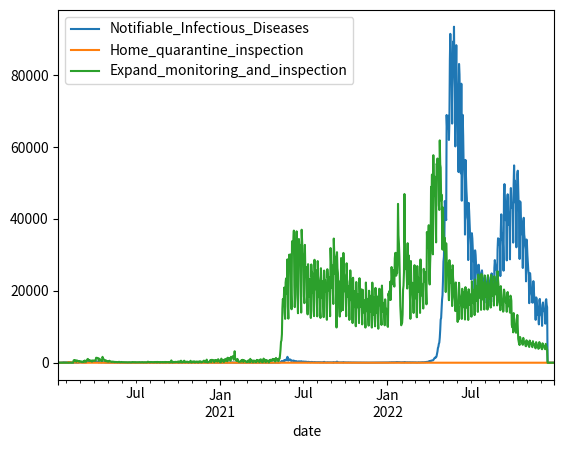

In [34]:
data_rename.plot(x="date",y=["Notifiable_Infectious_Diseases","Home_quarantine_inspection","Expand_monitoring_and_inspection"])
plt.show()

<AxesSubplot:xlabel='date'>

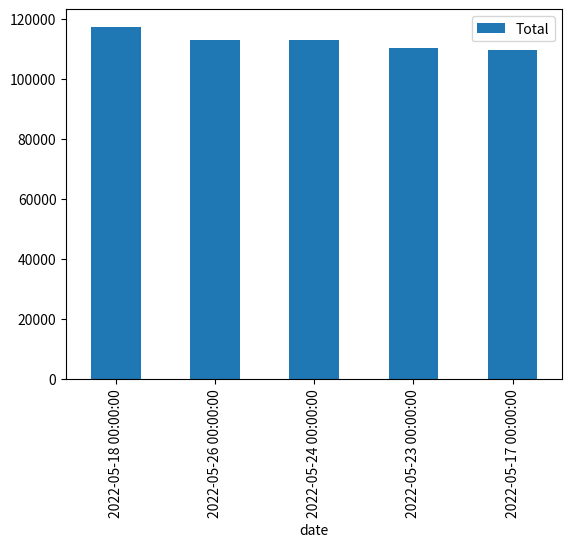

In [35]:
top5=data_rename.sort_values(by="Total",ascending=False).head()
top5.plot(x="date",y="Total",kind="bar",fontsize=10)

In [36]:
top5.head()

,date,Notifiable_Infectious_Diseases,Home_quarantine_inspection,Expand_monitoring_and_inspection,Total
854,2022-05-18,91465,0,25873,117338
862,2022-05-26,93447,0,19449,112896
860,2022-05-24,89314,0,23512,112826
859,2022-05-23,83278,0,27107,110385
853,2022-05-17,84042,0,25465,109507


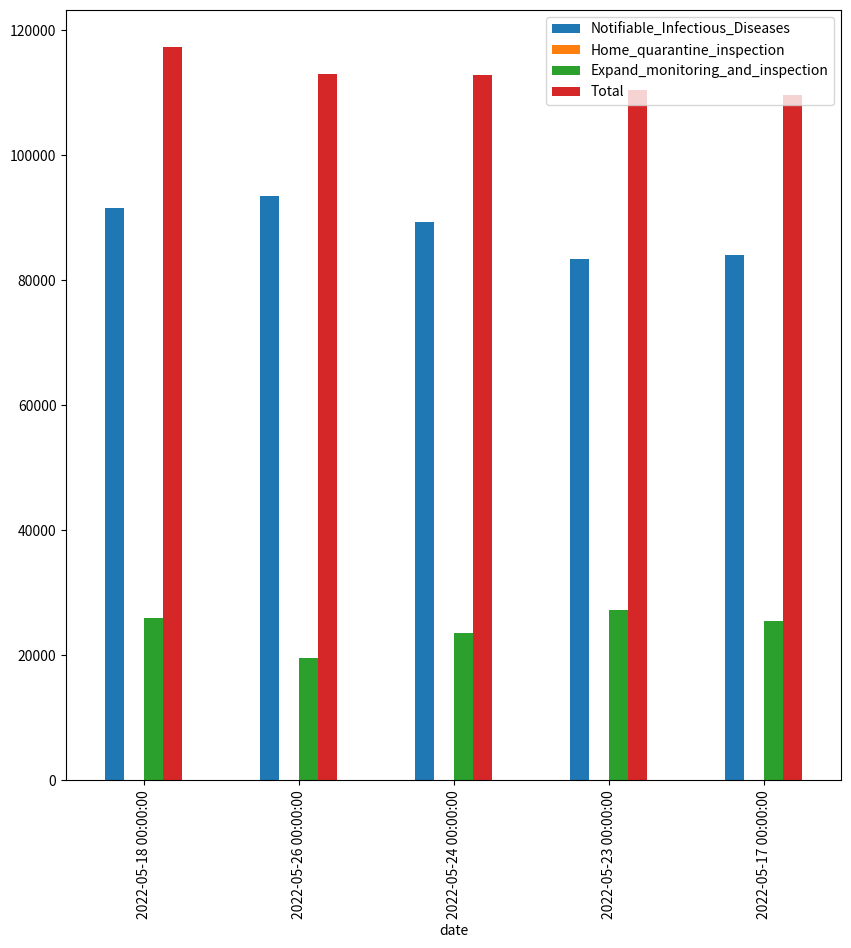

In [111]:
top5.plot(x="date",y=["Notifiable_Infectious_Diseases","Home_quarantine_inspection","Expand_monitoring_and_inspection","Total"],kind="bar",figsize=(10,10))
plt.savefig("長條圖")

<font size=5>根據上述資訊居家檢疫送驗的數量過少無參考價值故drop掉</font>

In [38]:
data_processed=data_rename.drop("Home_quarantine_inspection",axis=1)
#data_rename
data_processed

,date,Notifiable_Infectious_Diseases,Expand_monitoring_and_inspection,Total
0,2020-01-15,0,0,0
1,2020-01-16,4,0,4
2,2020-01-17,0,0,0
3,2020-01-18,1,0,1
4,2020-01-19,1,0,1
...,...,...,...,...
1077,2022-12-27,0,0,0
1078,2022-12-28,0,0,0
1079,2022-12-29,0,0,0
1080,2022-12-30,0,0,0


<font size=5>用matplotlib畫</font>

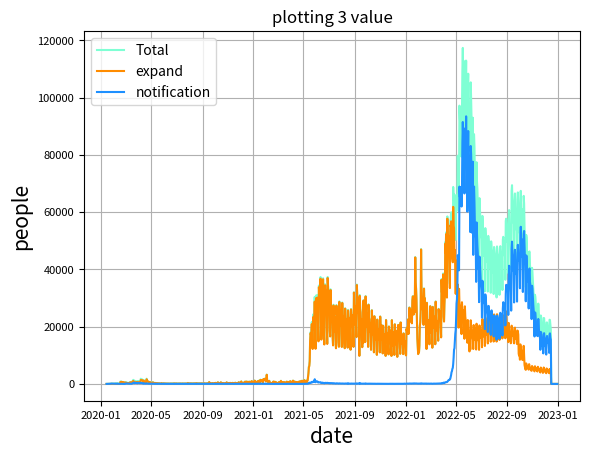

In [108]:
plt.plot(data_processed.date,data_processed.Total,'aquamarine',label="Total")
plt.plot(data_processed.date,data_processed.Expand_monitoring_and_inspection,'darkorange',label="expand")
plt.plot(data_processed.date,data_processed.Notifiable_Infectious_Diseases,'dodgerblue',label="notification")
plt.title('plotting 3 value')
plt.xlabel('date',fontsize=15)
plt.ylabel('people',fontsize=15)
plt.grid(True)
plt.legend()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.savefig("plotting 3 value")

## COVID-19 疫情紀錄表單
https://covid-19.nchc.org.tw/dt_005-covidTable_taiwan.php

In [41]:
covid=pd.read_excel("covid_data.xlsx")
covid_num=covid.drop(["id","iso_code","洲名","國家","總確診數","總確診數/每百萬人","新增確診數/每百萬人","七天移動平均新增確診數/每百萬人","總人口數","新聞稿發佈新增確診數"],axis=1)
covid_num

,日期,新增確診數,七天移動平均新增確診數
0,2022-01-01,21,22.714
1,2022-01-02,20,22.143
2,2022-01-03,25,23.429
3,2022-01-04,34,25.571
4,2022-01-05,26,27.286
...,...,...,...
348,2022-12-15,16078,14919.714
349,2022-12-16,15404,15069.571
350,2022-12-17,15616,15261.000
351,2022-12-18,15122,15409.429


In [78]:
covid_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   日期           353 non-null    datetime64[ns]
 1   新增確診數        353 non-null    int64         
 2   七天移動平均新增確診數  353 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.4 KB


In [42]:
covid_num.describe()

,新增確診數,七天移動平均新增確診數
count,353.000000,353.000000
mean,24281.543909,24161.881008
std,23207.074861,22799.936521
min,0.000000,22.143000
25%,203.000000,138.143000
50%,21951.000000,21752.000000
75%,38324.000000,38915.857000
max,94796.000000,82682.286000


In [44]:
#data_processed.loc[711]
arr=[]
for i in range(711):
    arr.append(i)
data_date=data_processed.drop(arr,axis=0)
data_date

,date,Notifiable_Infectious_Diseases,Expand_monitoring_and_inspection,Total
711,2021-12-26,46,10412,10458
712,2021-12-27,62,17625,17687
713,2021-12-28,53,15142,15195
714,2021-12-29,63,15067,15130
715,2021-12-30,97,13697,13794
...,...,...,...,...
1077,2022-12-27,0,0,0
1078,2022-12-28,0,0,0
1079,2022-12-29,0,0,0
1080,2022-12-30,0,0,0


In [90]:
important_date={}
get_value = data_processed.set_index("date")
important_date = {'date': ['2022-02-24','2022-04-24','2022-05-10','2022-05-27','2022-12-01'],'people': [get_value.loc["2022-02-24"].Total,get_value.loc["2022-04-24"].Total,get_value.loc["2022-05-13"].Total,get_value.loc["2022-05-27"].Total,get_value.loc["2022-12-01"].Total],'name':["指揮中心決定自3月1日起取消警戒分級不再適用","首次本土單日確診破5,000例","首次本土單日確診破5萬例","單日新增「本土」94,808例，創「歷史最高」紀錄","取消參與戶外活動全程佩戴口罩規定"]}
important_date = pd.DataFrame(important_date)
important_date['date'] = pd.to_datetime(important_date['date']) 
important_date

,date,people,name
0,2022-02-24,22346,指揮中心決定自3月1日起取消警戒分級不再適用
1,2022-04-24,48083,"首次本土單日確診破5,000例"
2,2022-05-10,89760,首次本土單日確診破5萬例
3,2022-05-27,98753,"單日新增「本土」94,808例，創「歷史最高」紀錄"
4,2022-12-01,18646,取消參與戶外活動全程佩戴口罩規定


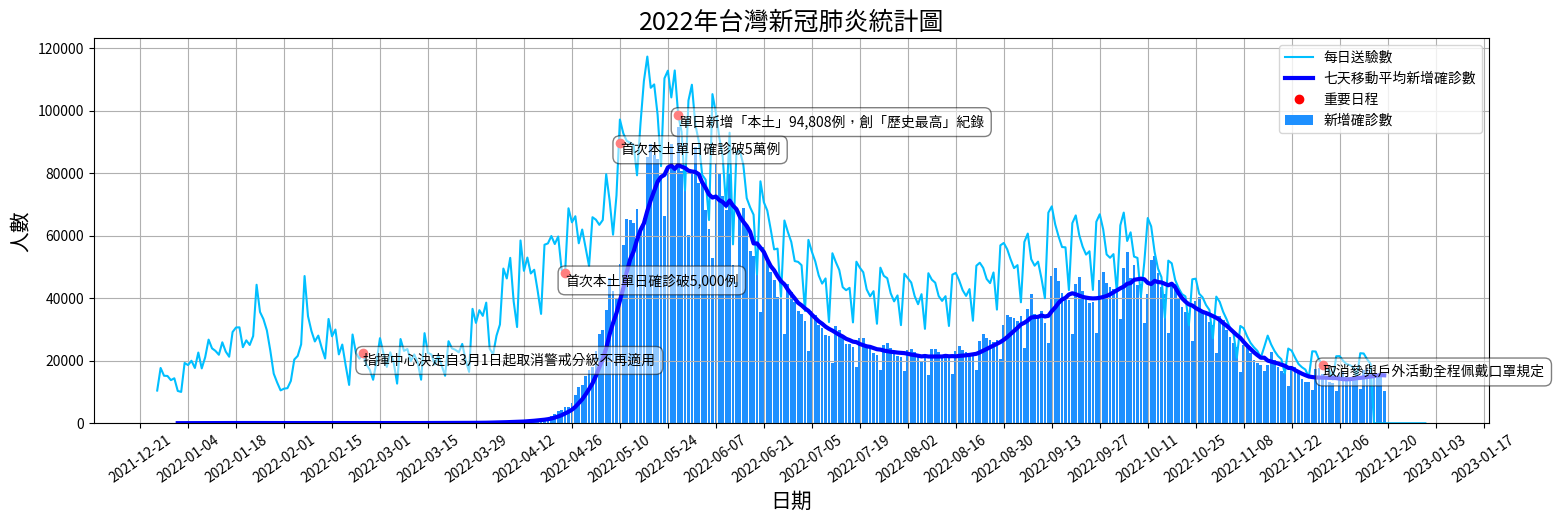

In [109]:
fig =plt.figure(figsize = (18,5))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14)) 
plt.bar(covid_num.日期,covid_num.新增確診數,color="dodgerblue",label="新增確診數")
plt.plot(data_date.date,data_date.Total,'deepskyblue',label="每日送驗數")
plt.plot(covid_num.日期,covid_num.七天移動平均新增確診數,color='blue',linewidth=3,label="七天移動平均新增確診數")
plt.plot(important_date.date,important_date.people,'or',linewidth=3,label="重要日程")

for i in range(len(important_date.people)):
    plt.text(important_date.date[i],important_date.people[i],important_date.name[i],fontsize=10,verticalalignment='top',bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='k',lw=1 ,alpha=0.5))

plt.title('2022年台灣新冠肺炎統計圖',fontsize=18)
plt.xlabel('日期',fontsize=15)
plt.ylabel('人數',fontsize=15)


plt.grid(True)
plt.legend()
#plt.tight_layout()
plt.xticks(fontsize=10,rotation=35)
plt.yticks(fontsize=10)
plt.savefig("2022年台灣新冠肺炎統計圖")